# Vanilla Policy Gradients for CartPole and Pong

In this notebook, you will implement a Vanilla Policy Gradient algorithm to train an agent to play CartPole (and Pong later, if desired). This uses the OpenAI gym library. Make sure you can install and run it.

In [1]:
# Some setup.

import time
import numpy as np
import matplotlib.pyplot as plt
from agents.policy_gradients import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
plt.rcParams['image.interpolation'] = 'linear'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x,y):
    """ Returns relative error. """
    return np.max( np.abs(x-y) / np.maximum(1e-8,np.abs(x)+np.abs(y)) )

# Discounted Rewards

With policy gradients, we need rewards to scale the gradient terms appropriately. Implement the method `discount_rewards` and test your implementation using the following cell. For some games, such as CartPole, we can sum the rewards by considering all of the subsequent rewards for a given episode. For Pong, however, the rewards should be reset to 0 after any player scores.

You will need to take care of both cases (set by the `do_reset` parameter). Do this even if you do not plan to test with Pong.

In [2]:
test = np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,-1], np.float)
output_1 = [-0.70017483, -0.70724731, -0.71439122, -0.72160729, -0.72889625, -0.73625884,
            -0.7436958,  -0.75120788, -0.75879584, -0.76646044, -0.77420247, -1.7921237,
            -1.81022596, -1.82851107, -1.84698088, -1.86563725, -1.88448208, -1.90351725,
            -1.92274469, -0.93206535, -0.94148015, -0.95099005, -0.96059601, -0.970299,
            -0.9801,     -0.99,       -1.        ]
output_2 = [ 0.90438208,  0.91351725,  0.92274469,  0.93206535,  0.94148015,  0.95099005,
             0.96059601,  0.970299,    0.9801,      0.99,        1.,         -0.93206535,
            -0.94148015, -0.95099005, -0.96059601, -0.970299,   -0.9801,    -0.99,     -1.,
            -0.93206535, -0.94148015, -0.95099005, -0.96059601, -0.970299,  -0.9801, -0.99, -1.]

PG = PolicyGradient()
rewards_1 = PG.discount_rewards(test, do_reset=False)
rewards_2 = PG.discount_rewards(test, do_reset=True)

# Should be around 1e-9
print(rel_error(output_1, rewards_1))
print(rel_error(output_2, rewards_2))

3.32314280378e-09
2.75945079139e-09


# Policy Gradients for CartPole

There are three places in the code to fill:

1. The method `policy_backward`, which will compute the gradients.
2. In the `train` method, you need to write the gradient for the final output layer (i.e., the last gradient in the overall computational graph) and store that in a list to be used at the end of the episode.
3. Also in the `train` method, you need to utilize the discounted rewards you wrote and integrate it into the computation of the gradient. In addition, you need to keep the overall `grad_buffer` up to date.

After you complete these, you should be able to train your agent on CartPole (and Pong, if desired).

To get full credit for this portion run CartPole with `max_episodes=400`, and report the final running reward, as well as a plot of all the running reward values. (The cell after the training call should do these two automatically.) You should aim to get a final running_reward of **at least 200.00**, and the plot for the running_rewards should show a clear upward trend, though it may sometimes decrease if there are games that last abnormally long. For reference, our implementation usually achieves running rewards of 500-5000 after 400 episodes. From our experience, the performance varies a lot with CartPole; we have gotten scores as high as a million, so save any output that meets the 200-score requirement.

Some additional comments:

1. You do not need to change the default hyperparameters provided, such as `learning_rate`. If you need to change one of them to get the minimum performance -- or if you think there's a compelling reason to do so -- explain your changes in a new text/Markdown cell.

2. Please keep `print_every=2` (or some other reasonable value) so that we can spot-check the rewards and running rewards per episode.

In [3]:
# Train an agent to play CartPole.
PG = PolicyGradient(D=2*2, H=30, learning_rate=0.01)
PG.train(environment="CartPole-v0", max_episodes=400, print_every=10)

[2016-11-18 20:21:28,153] Making new env: CartPole-v0


Ep. 10 done, reward: 12.0, running_reward: 11.5902, time (sec): 0.0332
Ep. 20 done, reward: 20.0, running_reward: 12.8451, time (sec): 0.0428
Ep. 30 done, reward: 59.0, running_reward: 16.3621, time (sec): 0.0576
Ep. 40 done, reward: 27.0, running_reward: 18.0358, time (sec): 0.0656
Ep. 50 done, reward: 20.0, running_reward: 19.2888, time (sec): 0.0730
Ep. 60 done, reward: 29.0, running_reward: 20.4944, time (sec): 0.0805
Ep. 70 done, reward: 19.0, running_reward: 21.2844, time (sec): 0.0874
Ep. 80 done, reward: 15.0, running_reward: 23.2937, time (sec): 0.0977
Ep. 90 done, reward: 55.0, running_reward: 25.0800, time (sec): 0.1082
Ep. 100 done, reward: 60.0, running_reward: 27.2729, time (sec): 0.1192
Ep. 110 done, reward: 51.0, running_reward: 30.0182, time (sec): 0.1314
Ep. 120 done, reward: 38.0, running_reward: 35.0641, time (sec): 0.1488
Ep. 130 done, reward: 76.0, running_reward: 38.3944, time (sec): 0.1633
Ep. 140 done, reward: 60.0, running_reward: 40.5976, time (sec): 0.1762
E

Final CartPole running reward: 450.118544806


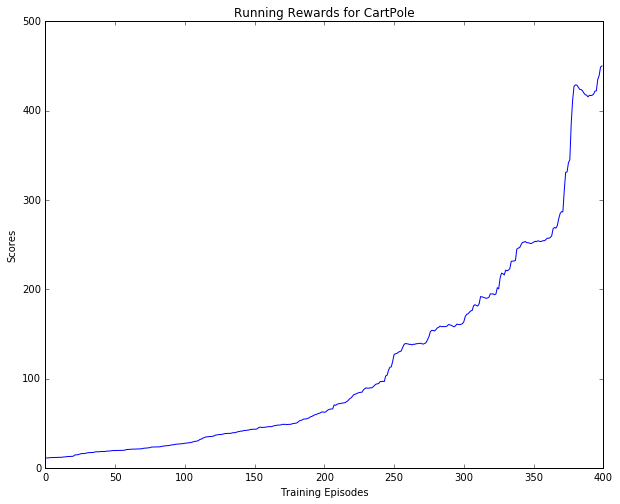

In [4]:
# Print final running_reward and plot the results.
print("Final CartPole running reward: {}".format(PG.running_rewards[-1]))
plt.figure()
plt.plot(PG.running_rewards)
plt.title("Running Rewards for CartPole")
plt.xlabel("Training Episodes")
plt.ylabel("Scores")

Most computers should be able to run larger, image-based environments like Pong. Although it will take much longer, especially on older machines, so this step is optional. To run Pong, do:

In [5]:
PG = PolicyGradient(D=80*80, H=200, learning_rate=0.001)
PG.train(environment="Pong-v0", max_episodes=500, print_every=2)

[2016-11-18 20:21:38,035] Making new env: Pong-v0


Ep. 2 done, reward: -20.0, running_reward: -20.9900, time (sec): 3.9714
Ep. 4 done, reward: -21.0, running_reward: -20.9902, time (sec): 10.6987
Ep. 6 done, reward: -21.0, running_reward: -20.9805, time (sec): 14.6098
Ep. 8 done, reward: -20.0, running_reward: -20.9610, time (sec): 20.7394
Ep. 10 done, reward: -21.0, running_reward: -20.9618, time (sec): 24.9009
Ep. 12 done, reward: -18.0, running_reward: -20.9226, time (sec): 31.2583
Ep. 14 done, reward: -21.0, running_reward: -20.9242, time (sec): 38.3981
Ep. 16 done, reward: -21.0, running_reward: -20.9059, time (sec): 42.4057
Ep. 18 done, reward: -21.0, running_reward: -20.9077, time (sec): 45.4927
Ep. 20 done, reward: -21.0, running_reward: -20.9096, time (sec): 49.3671
Ep. 22 done, reward: -20.0, running_reward: -20.9014, time (sec): 53.2020
Ep. 24 done, reward: -21.0, running_reward: -20.9033, time (sec): 56.7546
Ep. 26 done, reward: -21.0, running_reward: -20.8954, time (sec): 60.7095
Ep. 28 done, reward: -20.0, running_reward:

Final Pong running reward: -19.6582755821


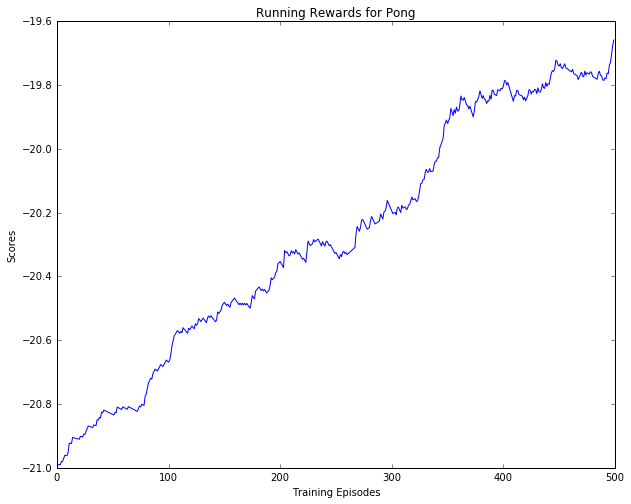

In [6]:
# Plot results.
running_reward_1 = PG.running_rewards

print("Final Pong running reward: {}".format(PG.running_rewards[-1]))
plt.figure()
plt.plot(PG.running_rewards)
plt.title("Running Rewards for Pong")
plt.xlabel("Training Episodes")
plt.ylabel("Scores")

# Optional

Congratulations on implementing Policy Gradients! 

Consider doing the following extensions:

1. Run the Pong code from the cells above and tune for best performance. Summarize your results. 
2. Introduce a baseline function for the rewards. This will also require refitting the baseline; we recommend using a linear function and Numpy's linear algebra solver. 
3. Try a neural network architecture which is substantially different from the current one we are using. Try using two hidden layers (instead of one) and/or using sigmoid non-linearity.
4. Extend the model to control more than two actions. You should use a softmax output. Try it, e.g. on Pong with the default action (actions [0,2,3]). 
5. Try an environment other than CartPole or Pong and see how the same architecture works (you need to look up the documentation for OpenAI gym, and run get_action_meanings on the environment). You will need to check the following: (1) that the game can be reduced to two controls, or that you implemented part 4 above, (2) that the preprocessing procedure makes sense, and (3) that your reward discounting is appropriate - some environments restart each time a reward is returned. 

State which one of these you are doing in the following cell(s). Describe results/statistics, show at least one plot, and provide at least one conclusion in the following cell.

These experiments will generally require you to write code outside of the areas you wrote earlier, so make sure you at least put in a code comment somewhere to explain what is new.

If you do an extension, modify the names of the log files e.g. `PG.running_rewards` to keep them distinct. 

### For this Policy Gradients, I did two extensions:
* Try different learning rates
* Add another hiddern layer in the neural network

For different learning rates, I only keep results of the learning rate that work for this problem. After changing the learning rate, the performance is better than the previous model.

In [11]:
# Change Learning Rate
PG1 = PolicyGradient(D=80*80, H=200, learning_rate=0.002)
PG1.train(environment="Pong-v0", max_episodes=500, print_every=2)
# Print final running_reward and plot the results.
rrewards_lr = PG1.running_rewards

[2016-11-18 20:48:39,905] Making new env: Pong-v0


Ep. 2 done, reward: -19.0, running_reward: -20.9800, time (sec): 4.1229
Ep. 4 done, reward: -20.0, running_reward: -20.9407, time (sec): 8.3385
Ep. 6 done, reward: -21.0, running_reward: -20.9419, time (sec): 12.1659
Ep. 8 done, reward: -21.0, running_reward: -20.9331, time (sec): 16.0573
Ep. 10 done, reward: -18.0, running_reward: -20.9045, time (sec): 20.3452
Ep. 12 done, reward: -21.0, running_reward: -20.8965, time (sec): 24.3327
Ep. 14 done, reward: -20.0, running_reward: -20.8885, time (sec): 28.4719
Ep. 16 done, reward: -20.0, running_reward: -20.8807, time (sec): 32.5948
Ep. 18 done, reward: -21.0, running_reward: -20.8633, time (sec): 37.2720
Ep. 20 done, reward: -19.0, running_reward: -20.8262, time (sec): 41.2528
Ep. 22 done, reward: -21.0, running_reward: -20.8297, time (sec): 44.9543
Ep. 24 done, reward: -21.0, running_reward: -20.8331, time (sec): 48.1180
Ep. 26 done, reward: -20.0, running_reward: -20.8264, time (sec): 51.6420
Ep. 28 done, reward: -21.0, running_reward: 

Final CartPole running reward: -18.0102464524


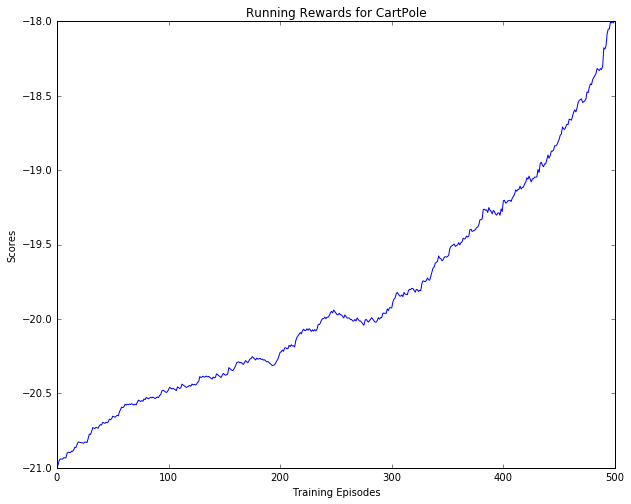

In [12]:
import cPickle as pickle
pickle.dump(rrewards_lr,open('rrewards_lr002.pkl','wb'))
#pickle.load(open('rrewards_lr002.pkl','rb'))
print("Final CartPole running reward: {}".format(PG1.running_rewards[-1]))
plt.figure()
plt.plot(rrewards_lr)
plt.title("Running Rewards for CartPole")
plt.xlabel("Training Episodes")
plt.ylabel("Scores")

The plot of the running reward after changning the learning rate to 0.002 is as above. We can see that it's better than the original model.

[2016-11-18 22:27:50,163] Making new env: Pong-v0


Ep. 2 done, reward: -21.0, running_reward: -21.0000, time (sec): 1.5448
Ep. 4 done, reward: -20.0, running_reward: -20.9801, time (sec): 3.4169
Ep. 6 done, reward: -17.0, running_reward: -20.9405, time (sec): 5.5005
Ep. 8 done, reward: -20.0, running_reward: -20.9317, time (sec): 7.2095
Ep. 10 done, reward: -20.0, running_reward: -20.9230, time (sec): 8.6722
Ep. 12 done, reward: -21.0, running_reward: -20.9246, time (sec): 10.1504
Ep. 14 done, reward: -20.0, running_reward: -20.9161, time (sec): 11.6197
Ep. 16 done, reward: -20.0, running_reward: -20.8978, time (sec): 13.3559
Ep. 18 done, reward: -21.0, running_reward: -20.8801, time (sec): 15.1320
Ep. 20 done, reward: -21.0, running_reward: -20.8825, time (sec): 16.6156
Ep. 22 done, reward: -21.0, running_reward: -20.8650, time (sec): 18.4803
Ep. 24 done, reward: -21.0, running_reward: -20.8578, time (sec): 20.0443
Ep. 26 done, reward: -21.0, running_reward: -20.8606, time (sec): 21.5864
Ep. 28 done, reward: -21.0, running_reward: -20

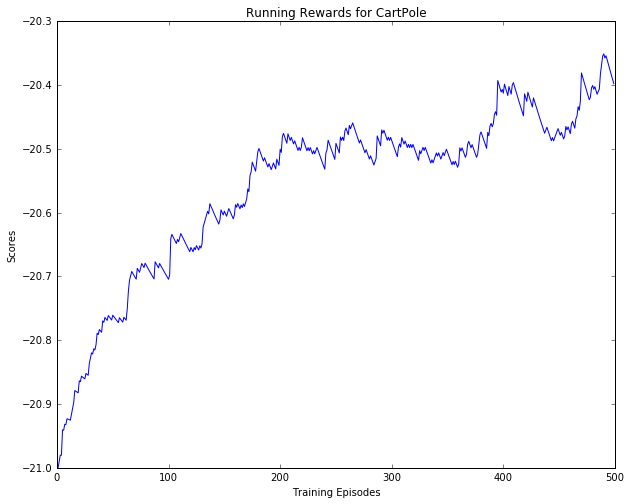

In [39]:
# Two Hidden Layers
from agents.policy_gradients_h2 import *
PG2 = PolicyGradient_h2(D=80*80, H1=10, H2 = 10, learning_rate=0.001)
PG2.train(environment="Pong-v0", max_episodes=500, print_every=2)
rrewards_lr2 = PG2.running_rewards
pickle.dump(rrewards_lr2, open('rrewards_lr_h2.pkl','wb'))
# Print final running_reward and plot the results.
print("Final CartPole running reward: {}".format(PG.running_rewards[-1]))
plt.figure()
plt.plot(rrewards_lr2)
plt.title("Running Rewards for CartPole")
plt.xlabel("Training Episodes")
plt.ylabel("Scores")

The training process is faster.